# **Introduction**

In this assignment, you will work with a dataset that includes The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. The target variable of interest in this dataset is the median value of owner-occupied homes (MEDV), which serves as a proxy for the house prices.
First, you will start by fitting a basic regression model using scikit-learn (sklearn) to establish a baseline for comparison. This basic regression model will serve as a reference point for evaluating the performance of more sophisticated models incorporating regularization techniques.

Furthermore, you will apply L1 (Lasso) and L2 (Ridge) regularization techniques to refine your predictions and evaluate the impact of these methods on the accuracy of your results. Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function, encouraging simpler models with smaller coefficients. L1 regularization (Lasso) encourages sparsity by penalizing the absolute values of coefficients, while L2 regularization (Ridge) penalizes the square of coefficients. By incorporating these regularization techniques, you aim to improve the generalization performance of your regression models and obtain more robust predictions of house prices in the Boston area.

## Imports

In [1]:
import os
import pandas
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import dump, load
from matplotlib import pyplot as plt

!wget -O /HousingData.csv "https://www.dropbox.com/scl/fi/j3rxgrd8l7fgczzhiedlp/new.csv?rlkey=yngaf57gumhtmm3hxffk20qll&dl=0"

--2024-04-07 07:58:50--  https://www.dropbox.com/scl/fi/j3rxgrd8l7fgczzhiedlp/new.csv?rlkey=yngaf57gumhtmm3hxffk20qll&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf7b776475381bedebd013882dc.dl.dropboxusercontent.com/cd/0/inline/CQhW8bc_E2bqEfKwyWMOOsk5u8HXfIzM1pkPSgiJNSQ1pcSUD9HYxrSv8QF-Kqh6MrWdUwJq277Rx01mNxxY5RrDqXSL3BO87GXqHV64D2mqpcwT2RQqFHnizdJpC49jdaMvd9tcnteafC4Y5g7DaT7b/file# [following]
--2024-04-07 07:58:51--  https://ucf7b776475381bedebd013882dc.dl.dropboxusercontent.com/cd/0/inline/CQhW8bc_E2bqEfKwyWMOOsk5u8HXfIzM1pkPSgiJNSQ1pcSUD9HYxrSv8QF-Kqh6MrWdUwJq277Rx01mNxxY5RrDqXSL3BO87GXqHV64D2mqpcwT2RQqFHnizdJpC49jdaMvd9tcnteafC4Y5g7DaT7b/file
Resolving ucf7b776475381bedebd013882dc.dl.dropboxusercontent.com (ucf7b776475381bedebd013882dc.dl.dropboxusercontent.com)... 162.125.13.15, 26

# Load and Explore

Load the dataset (as a dataframe) using pandas and display the top 5 rows of the dataframe and then check for missing values and impute missing values with mean

In [2]:
file_path = '/HousingData.csv'
# TODO: Load the Dataset and Check for mising values and then impute them with the mean value

data = pd.read_csv(file_path)

missing_values = data.isnull().sum()

data_imputed = data.fillna(data.mean())

data_imputed.head(), missing_values

(      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  TAX  PTRATIO  \
 0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  296     15.3   
 1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  242     17.8   
 2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  242     17.8   
 3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  222     18.7   
 4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  222     18.7   
 
         B      LSTAT  MEDV  
 0  396.90   4.980000  24.0  
 1  396.90   9.140000  21.6  
 2  392.83   4.030000  34.7  
 3  394.63   2.940000  33.4  
 4  396.90  12.715432  36.2  ,
 CRIM       0
 ZN         0
 INDUS      0
 CHAS       0
 NOX        0
 RM         0
 AGE        0
 DIS        0
 TAX        0
 PTRATIO    0
 B          0
 LSTAT      0
 MEDV       0
 dtype: int64)

Get a brief description of the dataset

In [3]:
# TODO: you can use .info() and .description()

info_description = data_imputed.info()
description = data_imputed.describe()

info_description, description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   TAX      506 non-null    int64  
 9   PTRATIO  506 non-null    float64
 10  B        506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 51.5 KB


(None,
              CRIM          ZN       INDUS        CHAS         NOX          RM  \
 count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
 mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
 std      8.545770   22.921051    6.699165    0.250233    0.115878    0.702617   
 min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
 25%      0.083235    0.000000    5.190000    0.000000    0.449000    5.885500   
 50%      0.290250    0.000000    9.900000    0.000000    0.538000    6.208500   
 75%      3.611874   11.211934   18.100000    0.000000    0.624000    6.623500   
 max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   
 
               AGE         DIS         TAX     PTRATIO           B       LSTAT  \
 count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
 mean    68.518519    3.795043  408.237154   18.455534  356.674032   12.715432   
 std   

Extract only the features from the dataframe by removing the target column and then Convert the new dataframe into a numpy array
</br>
Note: **Do not remove the previous dataframe.**


# Preprocessing

In [4]:
# TODO: drop MEDV and convert to numpy array

features_array = data_imputed.drop('MEDV', axis=1).to_numpy()

print(features_array.shape)
type(features_array), features_array

(506, 12)


(numpy.ndarray,
 array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]))

look for outliers using box plot and if There are some outliers in data, use StandardScaler can help in scaling data.

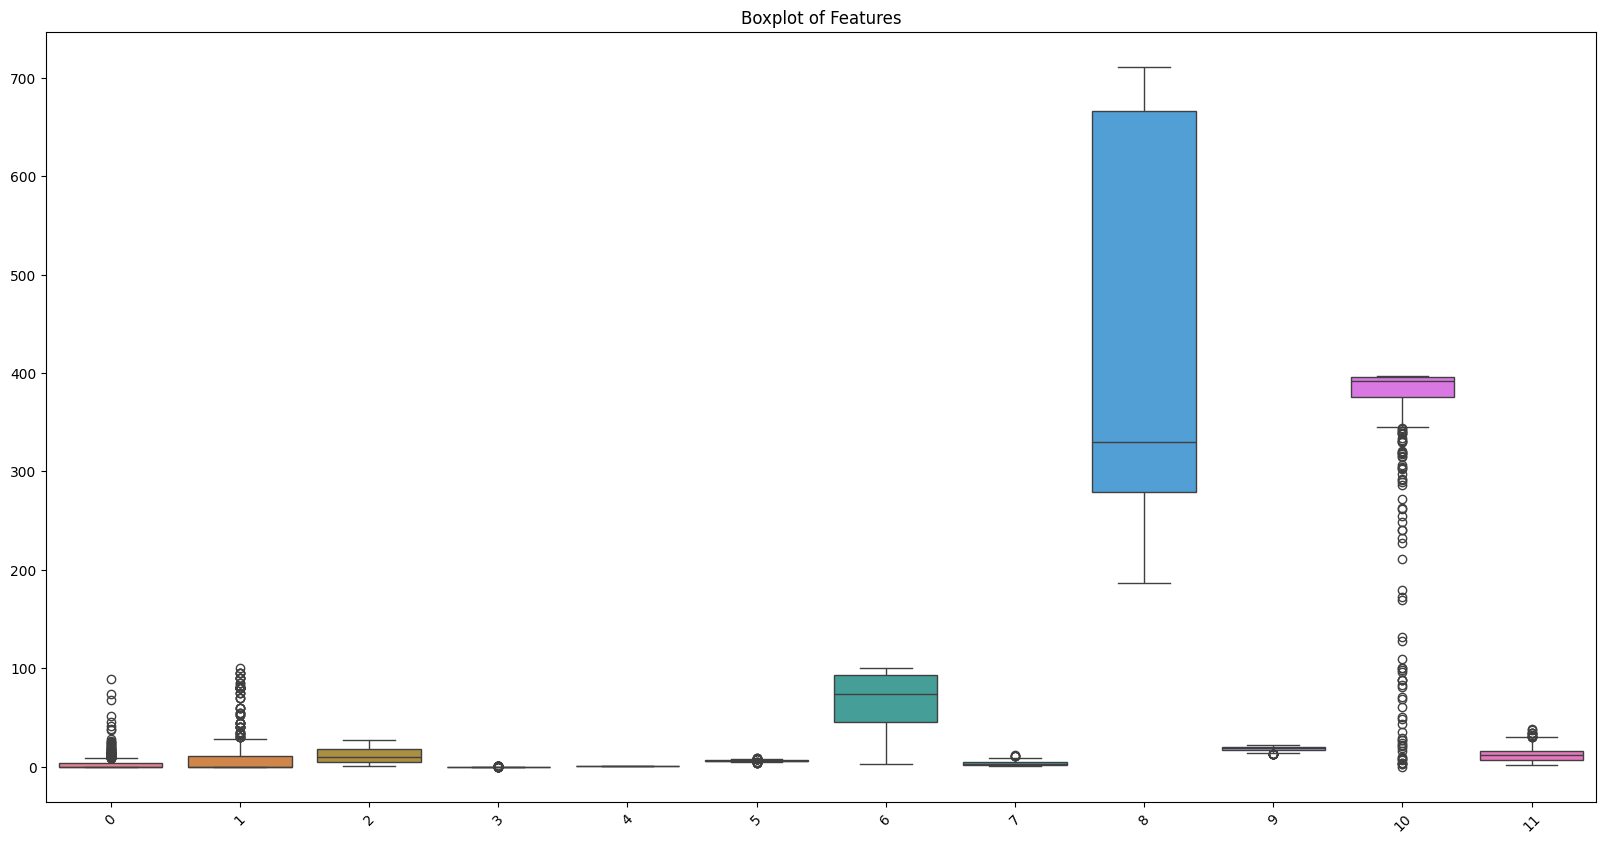

In [5]:
subset_data = data_imputed[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']]

# Plotting boxplots
plt.figure(figsize=(20, 10))
sns.boxplot(data=features_array)
plt.xticks(rotation=45)
plt.title('Boxplot of Features')
plt.show()

**Seems like we have outliers, mostly in '0', '1', '10', and '11'.**

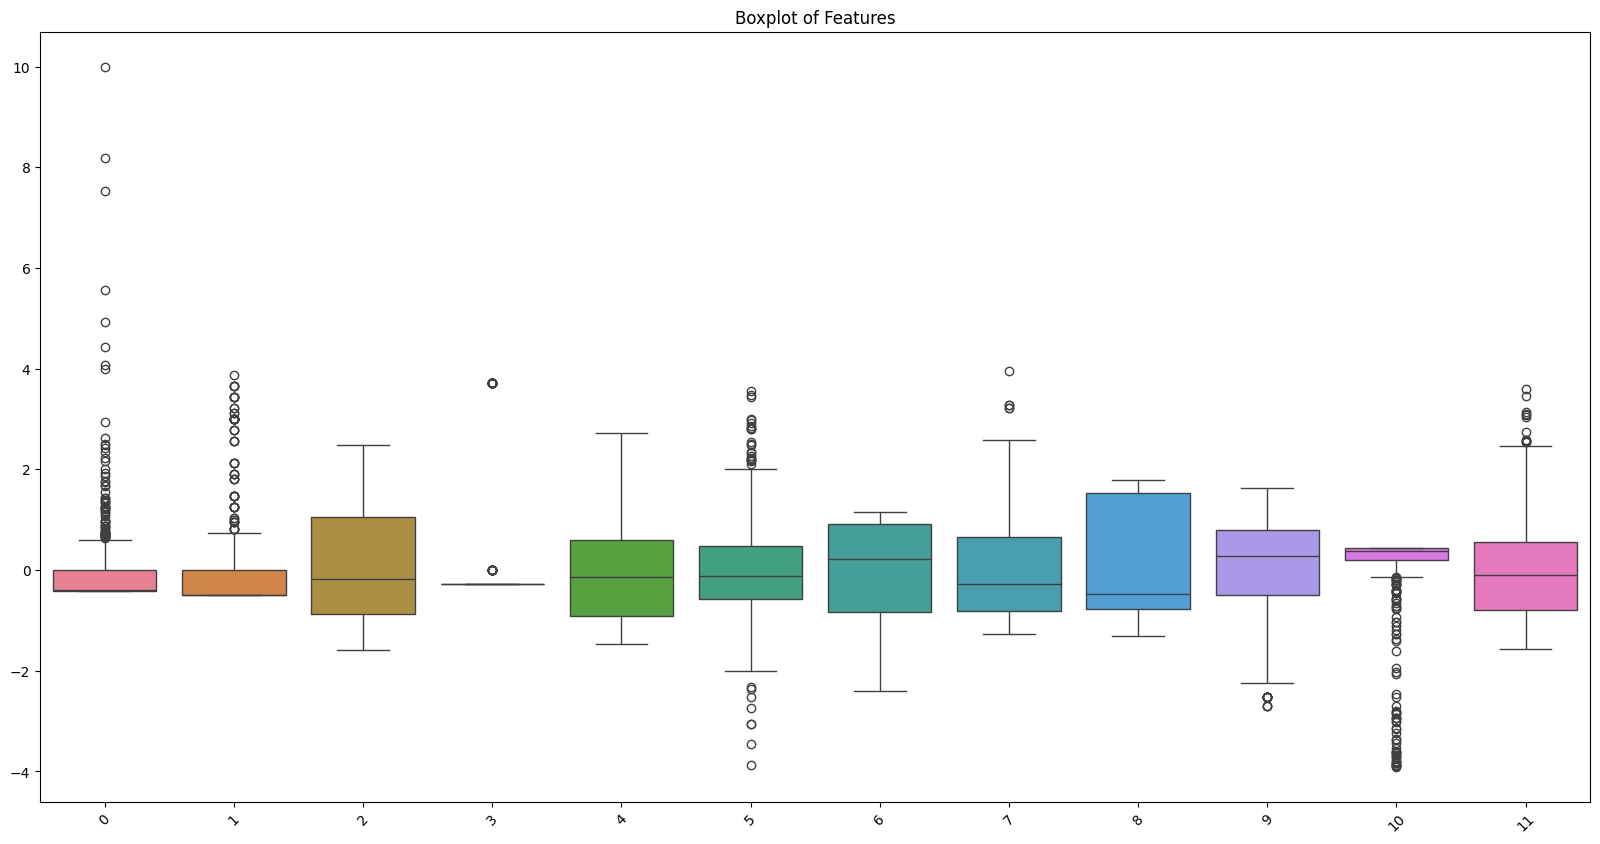

In [6]:
# Instantiate the scaler
scaler = StandardScaler()

# Fit the scaler to the features and transform
scaled_features = scaler.fit_transform(features_array)

# The scaled_features is now a numpy array with scaled data
# Plotting boxplots
plt.figure(figsize=(20, 10))
sns.boxplot(data=scaled_features)
plt.xticks(rotation=45)
plt.title('Boxplot of Features')
plt.show()

The box plot of scaled features shows that the data has been centered around zero, which based on StandardScaler's documents, is expected after applying StandardScaler.

Outliers are still seen, as scaling does not remove outliers but rather changes the scale of the data.

Seemms like features are now standardized to have a mean of zero and a standard deviation of one as expected using StandardScaler.

add polynomial features to increase model complexity!



In [7]:
# As it is not mentioned we will use degree 2 for the polynomial features
poly = PolynomialFeatures(2)

poly_features = poly.fit_transform(scaled_features)

poly_features.shape, poly_features[0]

((506, 91),
 array([ 1.        , -0.42232846,  0.29644292, -1.31101039, -0.27985132,
        -0.14421743,  0.41367189, -0.1210593 ,  0.1402136 , -0.66660821,
        -1.45900038,  0.44105193, -1.10414593,  0.17836133, -0.12519628,
         0.553677  ,  0.11818918,  0.06090713, -0.17470541,  0.05112679,
        -0.0592162 ,  0.28152762,  0.61617739, -0.18626878,  0.46631225,
         0.0878784 , -0.38863975, -0.08295994, -0.04275224,  0.1226301 ,
        -0.03588717,  0.04156533, -0.19761128, -0.43251033,  0.13074672,
        -0.32731624,  1.71874824,  0.36688799,  0.18907055, -0.54232814,
         0.15871   , -0.18382149,  0.87393029,  1.91276466, -0.57822367,
         1.44754678,  0.07831676,  0.04035944, -0.11576663,  0.03387861,
        -0.03923896,  0.18655119,  0.40830319, -0.12342897,  0.3089967 ,
         0.02079867, -0.0596587 ,  0.01745886, -0.02022125,  0.09613652,
         0.21041329, -0.06360738,  0.15923709,  0.17112443, -0.05007883,
         0.05800243, -0.27575708, -0.60

Extract the target column from the previously mentioned DataFrame and transform it into a new NumPy array, named y.

In [8]:
# TODO: extract the MEDV
y = data['MEDV'].to_numpy()

type(y), y[:5]

(numpy.ndarray, array([24. , 21.6, 34.7, 33.4, 36.2]))



Split the dataset into two parts such that the training set contains 80% of the samples.

In [9]:
# TODO: Split the dataset into two parts such that the training set contains 80% of the samples.

X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((404, 91), (404,)), ((102, 91), (102,)))

# Training


Fit a linear regressor to the data. (Use sklearn)


In [10]:
# TODO: Use sklearn

linear_regressor = LinearRegression()

linear_regressor.fit(X_train, y_train)

linear_regressor, linear_regressor.__class__.__name__

(LinearRegression(), 'LinearRegression')

Get the coefficients of the variables and visualize it

Coefficients of the variables in the sklearn:  [ 6.71326437e-15  2.61543210e+00  8.23937159e-01  2.71362629e-01
 -3.48211983e+00 -1.29409137e+00  3.44585661e+00 -1.21943076e+00
 -1.81707978e+00 -1.35705037e+00 -7.62724086e-01  9.41284776e-02
 -3.26790109e+00  1.88815533e-01 -2.12293611e+00  3.27201664e+00
  2.99592944e+00 -2.33583776e+00  3.47631370e-01  2.08741825e-01
  2.21883471e+00 -2.33322440e+00 -2.04447912e+00  7.41756805e-03
  1.19322150e+00 -8.41126027e-02  1.01385910e-01  2.74709658e-01
 -2.78021092e+00 -1.52798130e-01  7.61588328e-01 -1.08630659e+00
  2.97124880e+00 -2.68640233e-01 -3.02213841e+00 -1.60704564e+00
  1.31321171e+00 -3.11014224e-01 -5.10197825e-01  1.28252455e+00
  1.32809034e+00  1.38205448e+00 -6.50905063e-01 -1.06080996e+00
  7.72225398e-01 -5.06351131e-01  1.37177961e+00 -1.08949576e+00
 -9.50138209e-01 -4.45437289e-01 -1.69626905e+00  5.47158139e-01
 -1.88581634e-01  6.91851939e-03 -4.71226094e-01 -3.79170284e-01
 -1.24093403e+00  3.76740641e-01  3.6340884

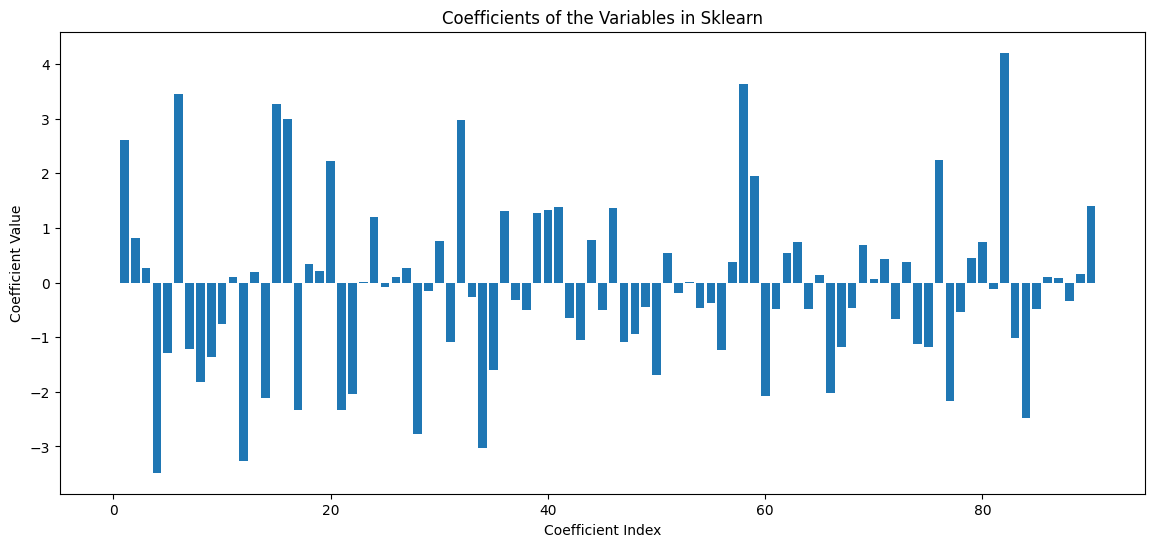

In [11]:
coefficients = linear_regressor.coef_

print("Coefficients of the variables in the sklearn: ", coefficients)

plt.figure(figsize=(14, 6))
plt.bar(range(len(coefficients)), coefficients)
plt.title('Coefficients of the Variables in Sklearn')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.show()


Get the score value of sklearn regressor on train dataset</br>
if you are not familiar with R-squared concept see the link below:
[R-squared](https://statisticsbyjim.com/regression/interpret-r-squared-regression/)



In [12]:
# TODO: Calculate R² score and MSE on the training dataset

# Get predictions on training dataset
y_train_pred = linear_regressor.predict(X_train)

r2_train = r2_score(y_train, y_train_pred)

mse_train = mean_squared_error(y_train, y_train_pred)

print("R² score on the training dataset: ", r2_train)
print("MSE on the training dataset: ", mse_train)


R² score on the training dataset:  0.9233615957926449
MSE on the training dataset:  6.65783903781899


Predict the value of "y" for each "x" belonging to the "testing" set

In [14]:
# Get predictions on testing dataset
y_test_pred = linear_regressor.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)

mse_test = mean_squared_error(y_test, y_test_pred)

print("R² score on the testing dataset: ", r2_test)
print("MSE on the testing dataset: ", mse_test)
print(y_test_pred)

R² score on the testing dataset:  0.752882288445089
MSE on the testing dataset:  18.122076674243075
[26.60760472 39.62214268 18.71401934 21.00627478 15.36932115 18.14967249
 19.2680689  14.04520907 20.41411804 19.68358046 19.34721612 17.80080883
  9.52923494 17.56130221 17.61765281 23.1886407  19.83784911  9.82571722
 48.00938013 13.01200313 24.67113881 28.75366122 15.14797668 19.48768303
 16.8711114  16.54597743 17.07120558 13.34377675 16.66485127 19.34855953
 18.50229727 23.95889069 15.48239335 25.70102382 13.69224402 17.48588361
 33.1589375  20.10130817 20.24277819 21.68697931 16.91569466 31.33039866
 53.78155342 15.35787882 27.30502419 15.90970181 14.76748839 23.49841731
 17.57527936 29.19894908 19.95253249 33.61207695 17.02933983 26.86934524
 44.01327048 23.0722288  13.43102214 32.42020215 25.15187612 12.20309801
 25.03914004 29.01333968 31.99975955 14.25741358 27.2478974  13.81980117
 14.35877776 24.56841459 29.12596225 12.07120755 21.52505912 27.39851469
  9.60239834 22.99803726

# Lasso Regularization(L1)

L1 regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator) regularization, is a technique used in regression models that encourages simplicity and sparsity in the model coefficients. This is achieved by adding a penalty equal to the absolute value of the magnitude of coefficients to the loss function.\
</br>
Train a regression model using L1 regularization.

Get the coefficients of the variables and visualize it.

In [15]:
# TODO: Use Lasso from sklearn library

lasso_regressor = Lasso(alpha=0.25)

lasso_regressor.fit(X_train, y_train)

lasso_regressor, lasso_regressor.__class__.__name__

(Lasso(alpha=0.25), 'Lasso')

Coefficients of the variables:  [ 0.         -0.          0.         -0.          0.         -0.
  3.01760959 -0.49405519 -0.         -0.02902105 -0.94142289  0.
 -3.52665225 -0.04338912  0.         -0.          0.         -0.
  0.         -0.          0.28676966 -0.         -0.         -0.
 -0.00395207  0.02402825 -0.          0.          0.          0.
 -0.          0.         -0.          0.          0.         -0.
  0.          0.         -0.         -0.          0.          0.
  0.         -0.          0.         -0.          0.29193997 -0.33147244
 -0.35622168  0.         -0.          0.62387723  0.          0.
 -0.2657691  -0.37873538 -0.61633286 -0.          0.         -0.
 -0.         -0.         -0.          0.58957268 -0.          0.
 -1.17193455 -0.668465   -0.         -0.          0.          0.
  0.         -0.         -0.         -0.10326043  0.          0.
  0.17360368 -0.          0.70422763  0.          0.         -0.
 -1.24132484 -0.         -0.         -0.         -

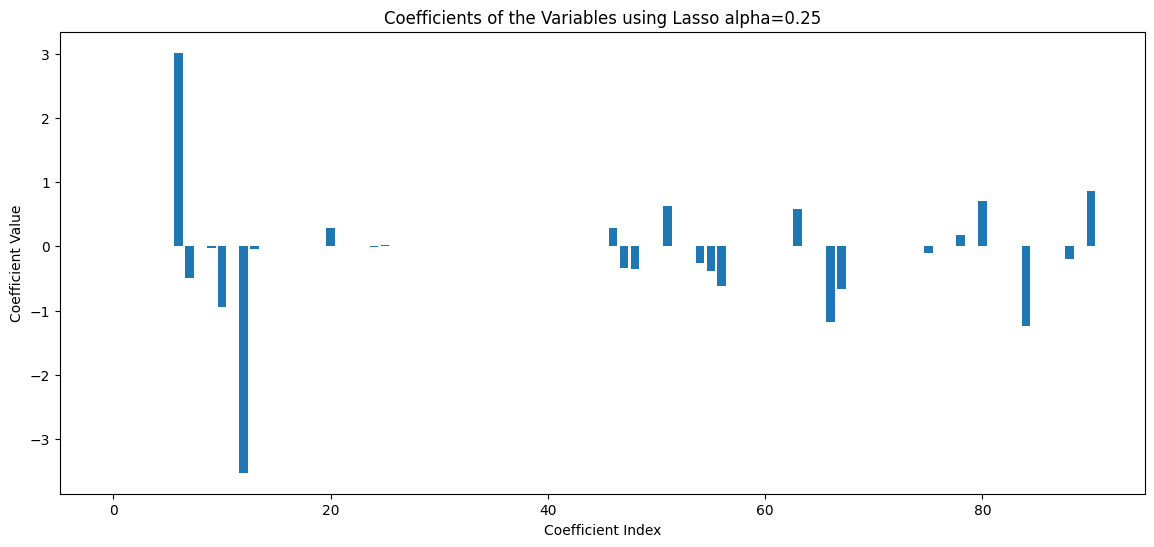

In [16]:
lasso_coefficients = lasso_regressor.coef_

print("Coefficients of the variables: ", lasso_coefficients)


plt.figure(figsize=(14, 6))
plt.bar(range(len(lasso_coefficients)), lasso_coefficients)
plt.title('Coefficients of the Variables using Lasso alpha=0.25')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.show()


In [17]:
# TODO: Use Lasso from sklearn library

lasso_regressor = Lasso(alpha=0.75)

lasso_regressor.fit(X_train, y_train)

lasso_regressor, lasso_regressor.__class__.__name__

(Lasso(alpha=0.75), 'Lasso')

Coefficients of the variables:  [ 0.         -0.          0.         -0.          0.         -0.
  2.40773009 -0.         -0.         -0.16111235 -0.81134051  0.
 -3.37847367 -0.10084176  0.         -0.          0.         -0.
 -0.         -0.          0.         -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
 -0.         -0.          0.          0.         -0.         -0.
  0.          0.         -0.         -0.         -0.          0.
 -0.          0.          0.         -0.          0.21739112 -0.
 -0.          0.         -0.          0.          0.          0.
 -0.         -0.07340816 -0.         -0.          0.         -0.
 -0.          0.         -0.          0.96416296 -0.          0.
 -0.2653154  -0.65056675  0.         -0.          0.          0.
 -0.         -0.         -0.         -0.         -0.          0.
  0.         -0.          0.         -0.          0.          0.
 -0.19438612  0.         -0.         -0.         -0.291313

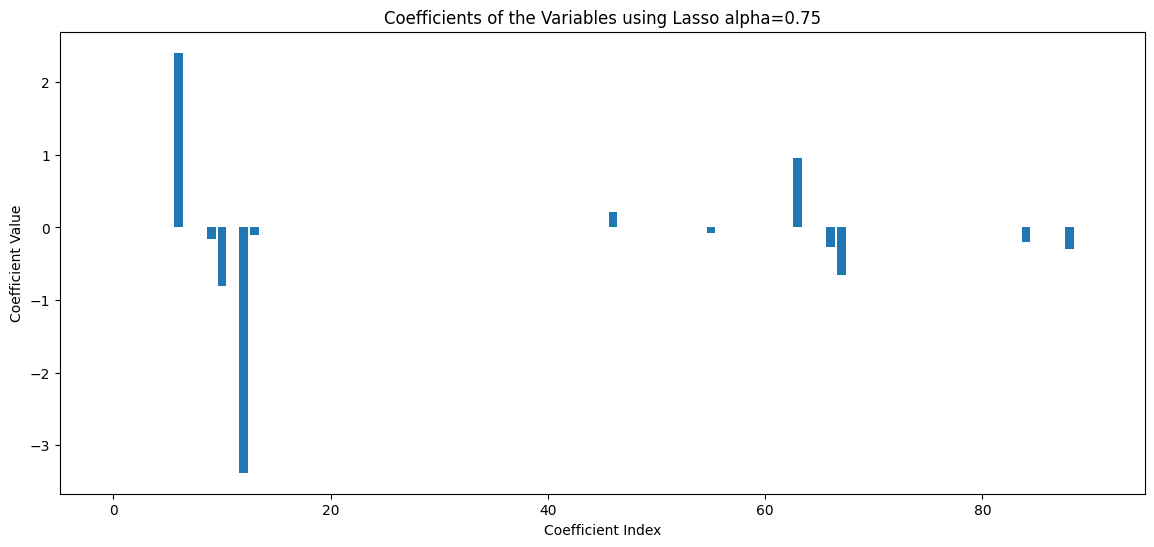

In [18]:
lasso_coefficients = lasso_regressor.coef_

print("Coefficients of the variables: ", lasso_coefficients)


plt.figure(figsize=(14, 6))
plt.bar(range(len(lasso_coefficients)), lasso_coefficients)
plt.title('Coefficients of the Variables using Lasso alpha=0.75')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.show()


In [19]:
# TODO: Use Lasso from sklearn library

lasso_regressor = Lasso(alpha=0.5)

lasso_regressor.fit(X_train, y_train)

lasso_regressor, lasso_regressor.__class__.__name__

(Lasso(alpha=0.5), 'Lasso')

Coefficients of the variables:  [ 0.         -0.          0.         -0.          0.         -0.
  2.71044561 -0.         -0.         -0.17551806 -0.87919831  0.
 -3.61571562 -0.09172222  0.         -0.          0.         -0.
  0.         -0.          0.         -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
 -0.         -0.          0.          0.         -0.         -0.
  0.          0.         -0.         -0.          0.          0.
  0.         -0.          0.         -0.          0.21657471 -0.
 -0.          0.         -0.          0.09712834  0.          0.
 -0.         -0.20798319 -0.1485112  -0.          0.         -0.
 -0.          0.         -0.          0.7562266  -0.          0.
 -0.85199921 -0.59720675  0.         -0.          0.          0.
 -0.         -0.         -0.         -0.         -0.          0.
  0.         -0.          0.26961623  0.          0.         -0.
 -0.8353172   0.         -0.         -0.         -0.243042

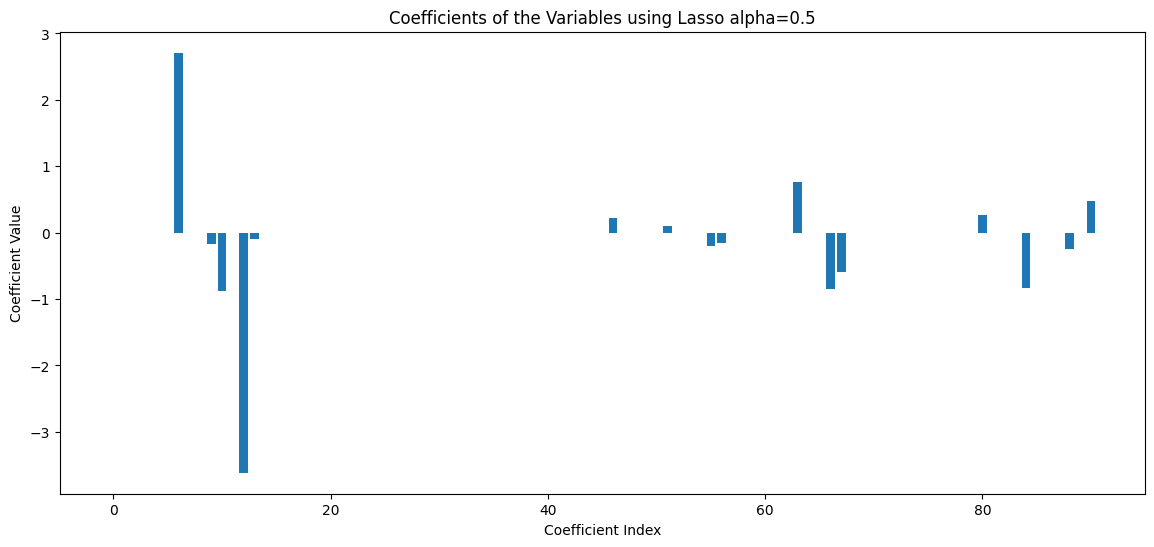

In [20]:
lasso_coefficients = lasso_regressor.coef_

print("Coefficients of the variables: ", lasso_coefficients)


plt.figure(figsize=(14, 6))
plt.bar(range(len(lasso_coefficients)), lasso_coefficients)
plt.title('Coefficients of the Variables using Lasso alpha=0.5')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.show()


1- What observations can you make about the weight distribution when applying L1 regularization?

2- How do different values of the regularization parameter (alpha) affect the sparsity of the model coefficients?

### 1- What observations can you make about the weight distribution when applying L1 regularization?

It seems like it has introduced sparsity to the coefficients, many of the coefficients are forced to zero, and the number of features the model relies on has reduced.

The remaining non-zero coefficients will be those that the algorithm has identified as having the most predictive power for the target variable.

The sparser models (with more coefficients forced to zero) [achieved with higher alpha values] show a stronger emphasis on simplicity and a preference for models that rely on fewer features for predicting target value.

As Lasso is penalizing the absolute size of the coefficients, the distribution of weights is not showing very large values because it tries to keep sum of the absolute values of the weights as small as possible.

### 2- How do different values of the regularization parameter (alpha) affect the sparsity of the model coefficients?

The alpha parameter is controling the strength of the penalty applied to the coefficients. With alpha increasing, the penalty increases, so more coefficients are being shrunk towards zero.

As we see with a lower alpha value (0.25), the penalty is weaker, resulting in less sparsity. This means that more coefficients remain non-zero and the model is less restricted.

As alpha is increased (to 0.5 and then 0.75), the penalty becomes stronger, and more coefficients are driven to zero, leading to increased sparsity in the model. This can lead to a simpler model that may generalize better but also risks underfitting if too many relevant features are excluded(by zeroing out more coefficients).

The choice of alpha can be critical:

If too small then the regularization effect may be insufficient to prevent overfitting,

If too large then the model may become too simple and fail to recognize the patterns in the data.

Get the score value on train *dataset*


In [23]:
# TODO: Calculate R² score and MSE on the training dataset

y_train_pred = lasso_regressor.predict(X_train)

r2_train = r2_score(y_train, y_train_pred)

mse_train = mean_squared_error(y_train, y_train_pred)

print("R² score on the training dataset: ", r2_train)
print("MSE on the training dataset: ", mse_train)
# print(y_train_pred)

R² score on the training dataset:  0.8171286694481938
MSE on the training dataset:  15.88665494849732


Predict the value of "y" for each "x" belonging to the "testing" set

In [25]:
# Get predictions on testing dataset
y_test_pred = linear_regressor.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)

mse_test = mean_squared_error(y_test, y_test_pred)

print("R² score on the testing dataset: ", r2_test)
print("MSE on the testing dataset: ", mse_test)
# print(y_test_pred)

R² score on the testing dataset:  0.752882288445089
MSE on the testing dataset:  18.122076674243075


# Ridge Regularization(L2)

L2 regularization, also known as Ridge regularization, is a technique used in regression models to prevent overfitting by adding a penalty equivalent to the square of the magnitude of coefficients to the loss function.
</br>
Train a regression model using L2 regularization.

### Alpha = 5

In [29]:
# TODO: Use Ridge from sklearn library
ridge_regressor = Ridge(alpha=5)

ridge_regressor.fit(X_train, y_train)

ridge_regressor, ridge_regressor.__class__.__name__

(Ridge(alpha=5), 'Ridge')

Get the coefficients of the variables and visualize it.

Coefficients of the variables:  [ 0.          0.35014864  0.68434854 -0.23596475 -0.63156843 -0.97540978
  3.38533881 -1.20826848 -1.77336385 -0.61666878 -0.8450282   0.40812727
 -3.0335445   0.17367675 -0.4634214   1.05964193  2.0709717  -1.43093833
  0.2514816  -0.22569531  1.12365209 -0.48290029 -0.67295607 -0.063493
  0.76927417  0.10977906  0.0540309   0.1929779  -0.57038804 -0.17557206
  0.22719666 -0.58451494  1.18327291 -0.11176774 -0.67184234 -0.8840974
  0.79247845 -0.1012521   0.10881455  0.76254191  1.02058954  0.97109132
 -0.14202464 -0.87949025  0.49941608 -0.77754824  0.54291649 -1.00891277
 -0.89591589 -0.23848485 -1.08101135  0.7258137  -0.1142485  -0.03369731
 -0.52574156 -0.32415811 -1.12630698 -0.2575344   1.38233431  0.43566627
 -0.95185563 -0.23361477  0.66940798  0.62784107 -0.39704282  0.26331066
 -1.56501271 -1.31480185 -0.38420083  0.53208178  0.19689175  0.40824477
 -0.01843885  0.20333957 -1.01603925 -1.02214217  1.39023911 -0.90626364
 -0.1354934  -0.220560

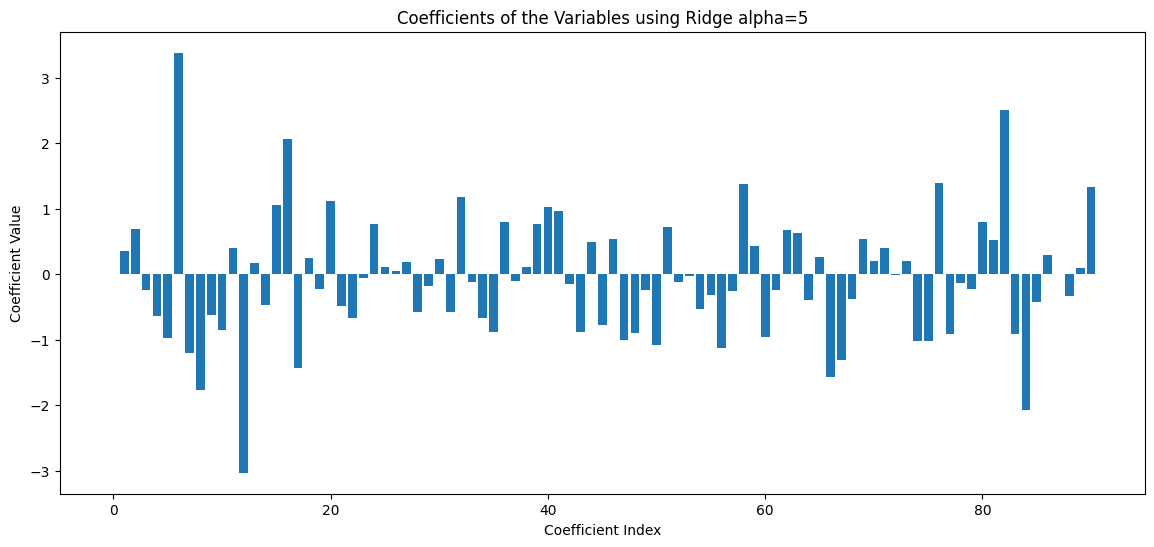

In [31]:
ridge_coefficients = ridge_regressor.coef_

print("Coefficients of the variables: ", ridge_coefficients)


plt.figure(figsize=(14, 6))
plt.bar(range(len(ridge_coefficients)), ridge_coefficients)
plt.title('Coefficients of the Variables using Ridge alpha=5')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.show()


### Alpha = 15

In [32]:
# TODO: Use Ridge from sklearn library
ridge_regressor = Ridge(alpha=15)

ridge_regressor.fit(X_train, y_train)

ridge_regressor, ridge_regressor.__class__.__name__

(Ridge(alpha=15), 'Ridge')

Get the coefficients of the variables and visualize it.

Coefficients of the variables:  [ 0.         -0.0540802   0.412918   -0.29089204 -0.20335624 -0.7836921
  3.23650669 -1.11319278 -1.44142005 -0.50113943 -0.95124568  0.41588937
 -2.86603542  0.15134913 -0.16035045  0.43867258  1.3343268  -0.90734076
  0.16498021 -0.18469665  0.80789256 -0.28220627 -0.23682168 -0.06847066
  0.37920498  0.14185292  0.03906743  0.23318404 -0.05899151 -0.10232121
  0.05608033 -0.31016001  0.44570425 -0.01935929 -0.20613546 -0.51021622
  0.59309206  0.07491768  0.17566294  0.44157166  0.73426718  0.62461509
  0.04736006 -0.6472626   0.31575612 -0.87406875  0.40827227 -0.91285505
 -0.85647082 -0.04365363 -0.71152024  0.77866859 -0.01922047 -0.06238911
 -0.58420576 -0.36163212 -1.08933442 -0.27426846  0.7877059   0.05597219
 -0.61284138 -0.23138333  0.53219956  0.60578425 -0.32298583  0.24011003
 -1.27960347 -1.28381009 -0.31515667  0.36308575  0.17909101  0.27721769
  0.17651586  0.14274385 -0.79609838 -0.87417809  0.92840398 -0.37772459
  0.04396194 -0.2588

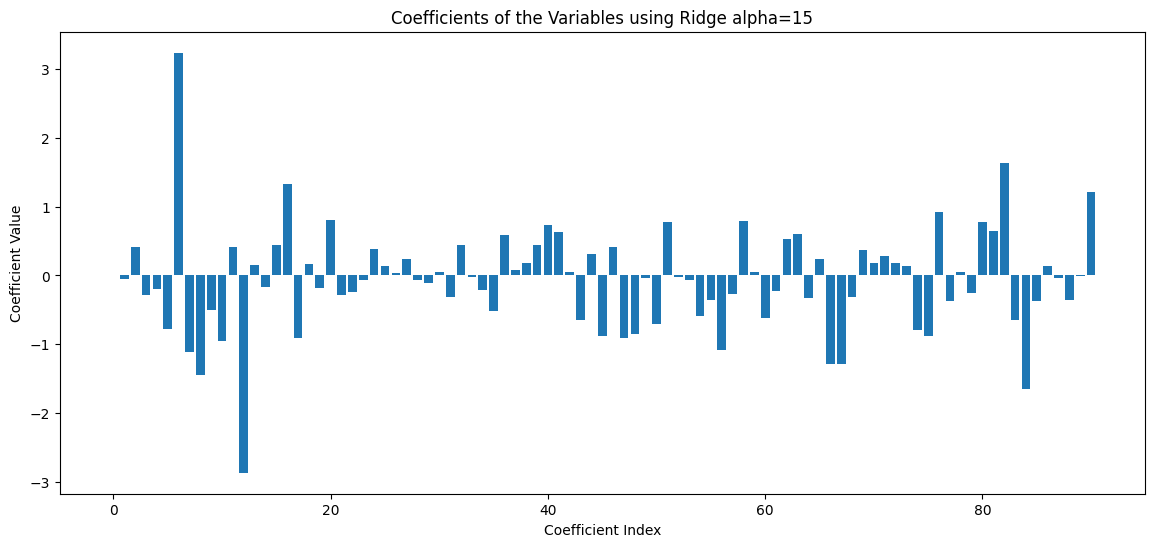

In [33]:
ridge_coefficients = ridge_regressor.coef_

print("Coefficients of the variables: ", ridge_coefficients)


plt.figure(figsize=(14, 6))
plt.bar(range(len(ridge_coefficients)), ridge_coefficients)
plt.title('Coefficients of the Variables using Ridge alpha=15')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.show()


### Alpha = 10

In [34]:
# TODO: Use Ridge from sklearn library
ridge_regressor = Ridge(alpha=10)

ridge_regressor.fit(X_train, y_train)

ridge_regressor, ridge_regressor.__class__.__name__

(Ridge(alpha=10), 'Ridge')

Get the coefficients of the variables and visualize it.

Coefficients of the variables:  [ 0.          0.05912156  0.51116396 -0.28467561 -0.32455353 -0.85827735
  3.30888276 -1.15903729 -1.59593251 -0.53180157 -0.91042787  0.42828162
 -2.94077889  0.16087076 -0.2517118   0.62754054  1.60530016 -1.09008989
  0.19857273 -0.21466179  0.91315274 -0.33329639 -0.37069977 -0.0685445
  0.53227529  0.13451302  0.04174477  0.21402759 -0.19753069 -0.13818418
  0.11128147 -0.41118718  0.69356948 -0.05349153 -0.33153368 -0.6523907
  0.65774546  0.00626011  0.17510478  0.56882038  0.84405893  0.75253857
 -0.01735362 -0.74138428  0.38541275 -0.84892644  0.44774634 -0.95605317
 -0.87633987 -0.11780543 -0.84245313  0.77371237 -0.05986682 -0.05282303
 -0.5612907  -0.35054369 -1.10824908 -0.28920456  0.95796985  0.161939
 -0.72743981 -0.23024552  0.59678367  0.61007814 -0.35547651  0.25507285
 -1.39082276 -1.30777268 -0.34506817  0.43935663  0.18768566  0.33640313
  0.12071674  0.17082987 -0.88889616 -0.93434533  1.1011708  -0.55229718
 -0.01954442 -0.2567901

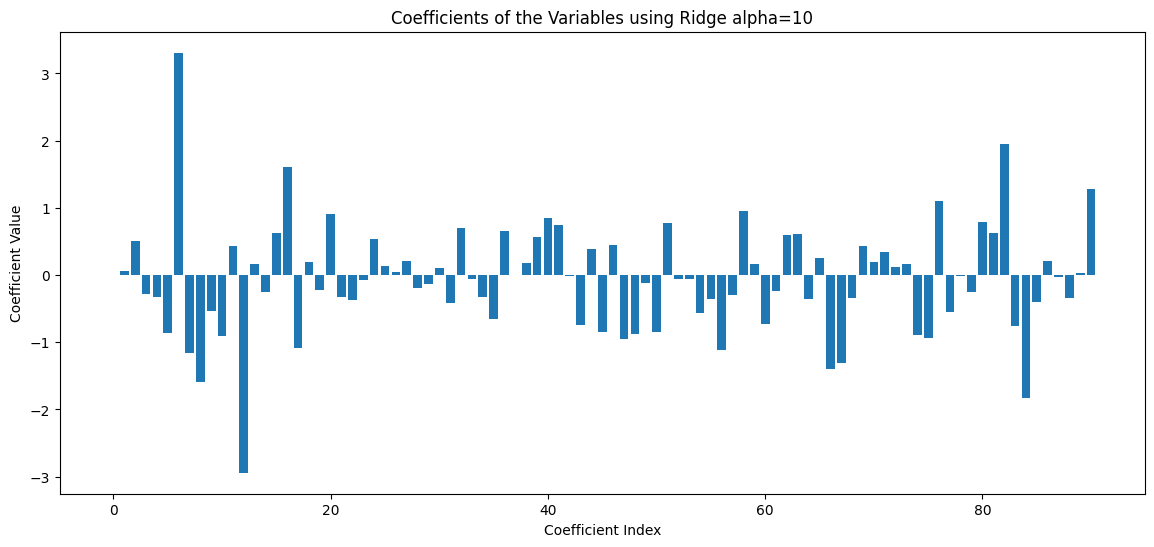

In [35]:
ridge_coefficients = ridge_regressor.coef_

print("Coefficients of the variables: ", ridge_coefficients)


plt.figure(figsize=(14, 6))
plt.bar(range(len(ridge_coefficients)), ridge_coefficients)
plt.title('Coefficients of the Variables using Ridge alpha=10')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.show()


Compare the effect on coefficients between L1 and L2 regularization. What are the key differences?

 How does the regularization parameter influence the magnitude of the coefficients in Ridge Regression?

#### **Compare the effect on coefficients between L1 and L2 regularization. What are the key differences?**

L1: Using L1 many coefficients can be exactly zero. This effect is useful for feature selection because it reduces the number of features by setting the coefficients of less important features to zero.

L2: Tends to shrink the coefficients evenly and does not necessarily set them to zero but rather close to zero. In the Ridge plot, there are no coefficients that are exactly zero; instead, they are distributed around zero with smaller magnitudes. This results in a model where all features are kept, but their influence is moderated.

#### **How does the regularization parameter influence the magnitude of the coefficients in Ridge Regression?**

Alpha in Ridge Regression controls the strength of the penalty, which is the sum of the squares of the coefficients.

As alpha increases, the penalty increases, leading to smaller coefficients as the model becomes more constrained and tries to fit the data while keeping the coefficients as small as possible.

In Ridge Regression, a higher alpha severely penalizes larger coefficients, which results in a more significant reduction in coefficient values (what we see with alpha value 15).

However, unlike Lasso, even with a high alpha, the coefficients are not reduced to zero but are scaled down, which means all features will be retained in the model.

If alpha is too large, Ridge Regression can over-constrain the model, leading to underfitting.

If alpha is too small, Ridge Regression effect can be negligible, not leading to reducing overfitting.

Get the score value on train *dataset*

In [37]:
# TODO: Calculate R² score and MSE on the training dataset

y_train_pred = ridge_regressor.predict(X_train)

r2_train = r2_score(y_train, y_train_pred)

mse_train = mean_squared_error(y_train, y_train_pred)

print("R² score on the training dataset: ", r2_train)
print("MSE on the training dataset: ", mse_train)
# print(y_train_pred)

R² score on the training dataset:  0.9143940529441623
MSE on the training dataset:  7.4368800090845655


Predict the value of "y" for each "x" belonging to the "testing" set



In [38]:
# Get predictions on testing dataset
y_test_pred = ridge_regressor.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)

mse_test = mean_squared_error(y_test, y_test_pred)

print("R² score on the testing dataset: ", r2_test)
print("MSE on the testing dataset: ", mse_test)
print(y_test_pred)

R² score on the testing dataset:  0.7939553068756479
MSE on the testing dataset:  15.110036846916527
[26.64874045 37.58387034 19.27657644 21.94197185 15.3028101  20.12028532
 19.06550135 13.09220054 21.53629599 19.59853597 19.98066811 17.71773856
  7.45618135 19.4698435  17.83085991 22.41342776 19.03460611 10.83733093
 47.87734976 13.23733086 25.94978663 28.67626209 15.62739061 20.87266644
 16.88618107 16.70243714 18.15202381 12.99400863 19.06044753 19.1619615
 18.49185044 23.96483655 16.81029968 24.22140047 14.71608764 17.14764076
 33.00621736 20.36005585 21.56765845 22.00579786 16.87716829 30.83029389
 52.86535583 16.40416721 26.70438602 16.00962769 15.37456958 24.22203195
 18.0413712  28.35774744 18.65466298 33.07812494 17.01116837 25.34703163
 43.22198358 23.00525594 14.66623572 32.34427145 25.00498764 14.21572885
 24.95594853 33.4162596  30.78344757 16.16942493 25.19231399 16.02456508
 14.58662856 24.41159615 30.32473275 12.3838725  20.94435871 27.5999913
 10.37505112 21.25995733 

# Summarization

Summarize the performance metrics (e.g., RMSE, R² score) of the basic regression model, Lasso regression, and Ridge regression in a table for easy comparison.(On both test and train data)</br>
if you are not familiar with R-squared concept see the link below:
[R-squared](https://statisticsbyjim.com/regression/interpret-r-squared-regression/)


In [42]:
# HINT: Use DataFrame tools

# Basic regression
y_train_pred_basic = linear_regressor.predict(X_train)
y_test_pred_basic = linear_regressor.predict(X_test)

mse_train_basic = mean_squared_error(y_train, y_train_pred_basic)
mse_test_basic = mean_squared_error(y_test, y_test_pred_basic)
r2_train_basic = r2_score(y_train, y_train_pred_basic)
r2_test_basic = r2_score(y_test, y_test_pred_basic)

# Lasso regression
y_train_pred_lasso = lasso_regressor.predict(X_train)
y_test_pred_lasso = lasso_regressor.predict(X_test)

mse_train_lasso = mean_squared_error(y_train, y_train_pred_lasso)
mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

# Ridge regression
y_train_pred_ridge = ridge_regressor.predict(X_train)
y_test_pred_ridge = ridge_regressor.predict(X_test)

mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)

performance_comparison = pd.DataFrame({
    "Model": ["Basic Regression", "Lasso Regression", "Ridge Regression"],
    "MSE(Test)": [mse_test_basic, mse_test_lasso, mse_test_ridge],
    "MSE(Train)": [mse_train_basic, mse_train_lasso, mse_train_ridge],
    "R² Score (Test)": [r2_test_basic, r2_test_lasso, r2_test_ridge],
    "R² Score (Train)": [r2_train_basic, r2_train_lasso, r2_train_ridge]
})

performance_comparison

,Model,MSE(Test),MSE(Train),R² Score (Test),R² Score (Train)
0,Basic Regression,18.122077,6.657839,0.752882,0.923362
1,Lasso Regression,16.227427,15.886655,0.778718,0.817129
2,Ridge Regression,15.110037,7.436880,0.793955,0.914394


from matplotlib import pyplot as plt
performance_comparison['MSE(Test)'].plot(kind='hist', bins=20, title='MSE(Test)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
performance_comparison['MSE(Train)'].plot(kind='hist', bins=20, title='MSE(Train)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
performance_comparison['R² Score (Test)'].plot(kind='hist', bins=20, title='R² Score (Test)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
performance_comparison['R² Score (Train)'].plot(kind='hist', bins=20, title='R² Score (Train)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
performance_comparison.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
performance_comparison.plot(kind='scatter', x='MSE(Test)', y='MSE(Train)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
performance_comparison.plot(kind='scatter', x='MSE(Train)', y='R² Score (Test)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
performance_comparison.plot(kind='scatter', x='R² Score (Test)', y='R² Score (Train)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['R² Score (Test)']
  ys = series['MSE(Test)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = performance_comparison.sort_values('R² Score (Test)', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('R² Score (Test)')
_ = plt.ylabel('MSE(Test)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['R² Score (Test)']
  ys = series['MSE(Train)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = performance_comparison.sort_values('R² Score (Test)', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('R² Score (Test)')
_ = plt.ylabel('MSE(Train)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['R² Score (Test)']
  ys = series['R² Score (Train)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = performance_comparison.sort_values('R² Score (Test)', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('R² Score (Test)')
_ = plt.ylabel('R² Score (Train)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['R² Score (Test)']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'R² Score (Test)'}, axis=1)
              .sort_values('R² Score (Test)', ascending=True))
  xs = counted['R² Score (Test)']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = performance_comparison.sort_values('R² Score (Test)', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('R² Score (Test)')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
performance_comparison['MSE(Test)'].plot(kind='line', figsize=(8, 4), title='MSE(Test)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
performance_comparison['MSE(Train)'].plot(kind='line', figsize=(8, 4), title='MSE(Train)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
performance_comparison['R² Score (Test)'].plot(kind='line', figsize=(8, 4), title='R² Score (Test)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
performance_comparison['R² Score (Train)'].plot(kind='line', figsize=(8, 4), title='R² Score (Train)')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(performance_comparison['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(performance_comparison, x='MSE(Test)', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(performance_comparison['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(performance_comparison, x='MSE(Train)', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(performance_comparison['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(performance_comparison, x='R² Score (Test)', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(performance_comparison['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(performance_comparison, x='R² Score (Train)', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

 *Which model performed best on the test data?</br>
Why the results on train data are different? </br>
Discuss why this might be the case.*

#### **Which model performed best on the test data?**

Ridge Regression model preformed the best on the test data, as it had the lowest MSE (Mean Squared Error) and the highest R² score.

#### **Why the results on train data are different?**

The Basic Regression model had the best result on the train data, which is probably because it has overfitted to the training data, hence, resulting in a weak generalization to the test data.

#### **Discuss why this might be the case.**

Ridge Regression's regularization probably has prevented overfitting better than the Basic Regression, as it shows better generalization in its result on test.

Lasso also improved test performance by simplifying the model, which could be good if there was irrelevancy or redundancy in ourr dataset (we dont know by definition if there is one, we are just concluding based on statistical results).